# Time series exploratory analysis

### Imports and main functions

In [2]:
from fredapi import Fred
import sys
import pandas as pd
from plotly.offline import init_notebook_mode, iplot, plot
import chart_studio.plotly as py
import plotly.graph_objs as go
from statsmodels.tsa.stattools import adfuller
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import statistics as st
%run -i C:/Users/champ/Python_proj/base_financial_repo/Econometric_data_repo/meta_data/API
    
econ_data_labels = { "GDP":
      { "column_name": "GDP",
        "color": "gray",
        "name": "GDP",
        "text": "GDP"
      }}
econ_data_titles = { 'titles':
      { 'chart_title': 'Annualized GDP',
        'y_axis_title': 'Annualized GDP',
        'x_axis_title': 'Date',
      }}

def get_FRED_data(FRED_series,
                  start_date,
                  API):
    '''
    This function downloads the econometric data from
    Federal Reserve Economic Data - FRED using an API
    '''
    if not(API):
        print('')
        print(' YOU DON''T HAVE A FRED API. THE FRED DATA'
          ' WILL NOT UPDATE UNTIL ONE IS PRESENT.'
          ' THERE ARE INSTRUCTIONS IN THE PRE-REQUISITES.')
    fred = Fred(API)
    FRED_data = pd.DataFrame()
    FRED_data = fred.get_series(FRED_series, start_date)
    FRED_data.index = pd.to_datetime(FRED_data.index, format='%Y-%m-%d')

    return (FRED_data)

def plotly_time_series(df_labels,df_titles,df, font):
    count = 0
    d = {} #Empty dictionary to add values into
    list_dict_titles = list(df_titles.keys())
    list_dict = list(df_labels.keys())
    print(list_dict)
    for i in list_dict:
        d[count] = go.Scatter(x=df.index,
                           y=df[df_labels[i]['column_name']],
                           line=go.scatter.Line(color=df_labels[i]['color'], width = font*3),
                               opacity=0.8,
                               name=df_labels[i]['name'],
                               text=df_labels[i]['text'])
        count+=1
    layout = go.Layout(height=800, width=1400, font=dict(size=20),
                       title=df_titles['titles']['chart_title'],
                        yaxis=dict(title=df_titles['titles']['y_axis_title'], showspikes=True,
                                   fixedrange = False),
                       xaxis=dict(title=df_titles['titles']['x_axis_title'], showspikes=True,
                               rangeslider=dict(visible=True),
                               rangeselector=dict(
                               buttons=list([
                            dict(count=1, label="1m", step="month", stepmode="backward"),
                            dict(count=6, label="6m", step="month", stepmode="backward"),
                            dict(count=1, label="YTD", step="year", stepmode="todate"),
                            dict(count=1, label="1y", step="year", stepmode="backward"),
                            dict(count=6, label="5y", step="year", stepmode="backward"),
                            dict(step="all")
                    ]))))
    tot_temp = ''
    for i in range(len(d)):
        temp = 'd[' + str(i) + ']'
        comma = ','
        if i < len(d):
            tot_temp = tot_temp + temp + comma
        else:
            tot_temp = tot_temp + temp
    fig = go.Figure(data=eval(tot_temp), layout=layout)
    iplot(fig)
    
def function_shift(df, shift):
    df = df.shift(shift)
    if shift < 0:
        shift_num = 'neg_' + str(-shift)
    else:
        shift_num = 'posi' + str(shift)
    df.columns = [shift_num]
    return(df, shift_num)
    
def difference(values, period):
    '''
    This function is a return and the specified period w/o
    considering total value. i.e. withdrawels/deposits
    '''
    # period=1
    diff_df = pd.DataFrame()
    diff_df = values
    diff_df = ((values - values.shift(period)) /
                 values.shift(period))
    diff_df = diff_df.dropna()
    return(diff_df)

def sample_mean(value):
    mu=np.mean(value)
    return(mu)

def arithmetic_return(value,period=1):
    return_df = pd.DataFrame()
    return_df=value.pct_change(period)
    return_df = return_df.dropna()
    return(return_df)

def annualized_mean(mu, period=252):
    annl_mn=((mu+1)**period)-1
    return(annl_mn)

def sample_standard_deviation(return_values):
    st_dev=st.stdev(return_values)  # 
    return(st_dev)

def annualized_standard_deviation(st_dev_daily,mu_daily, periods = 252):
    annl_stdev=np.sqrt((st_dev_daily**2+((mu_daily+1)**2))**periods-((mu_daily+1)**(2*periods)))
    #annl_stdev=st_dev_daily*np.sqrt(252)
    return(annl_stdev)

In the following I show a plotly graph of Annualized GDP 

### Sample time series data and graph

['GDP']


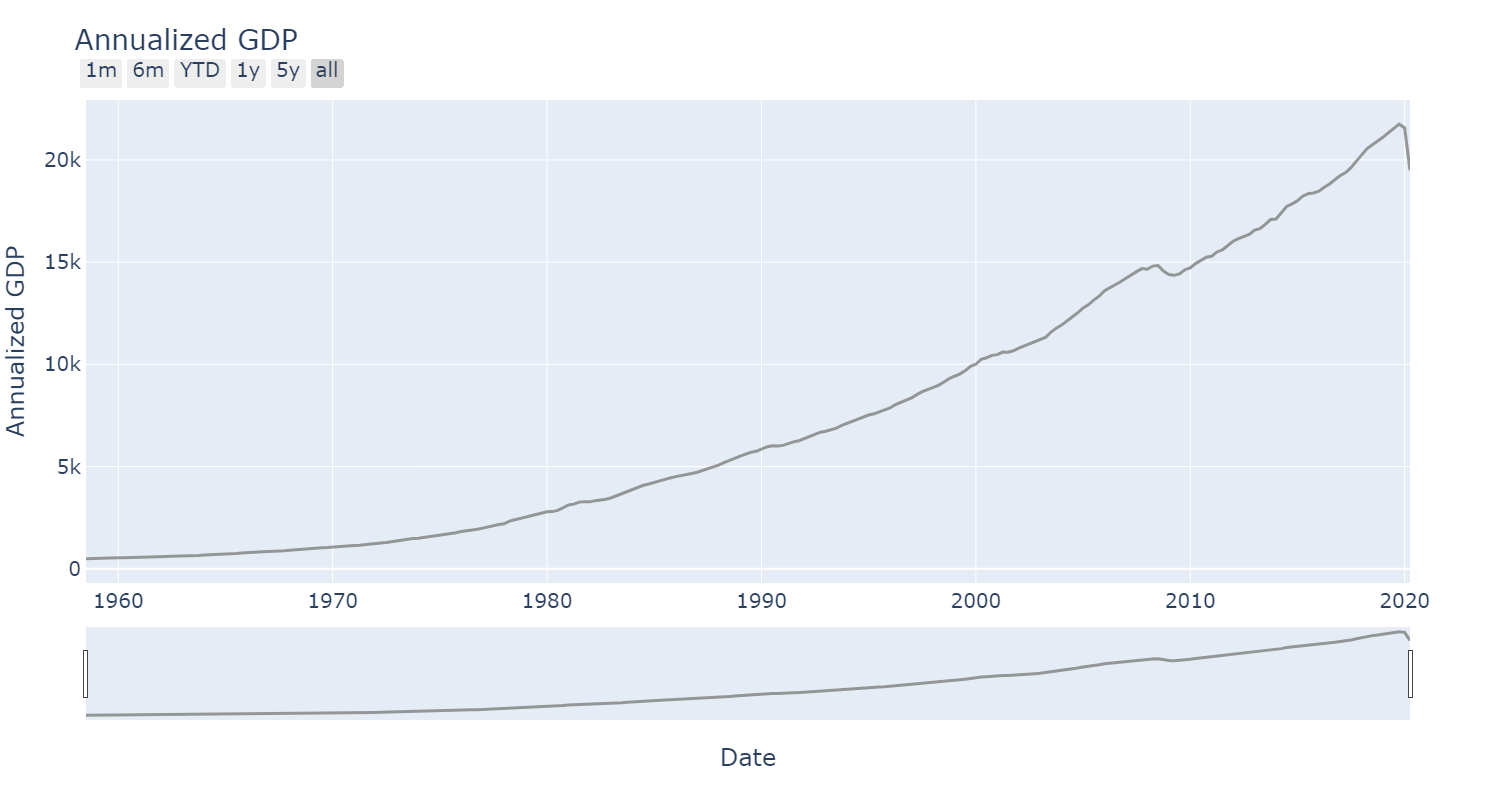

In [3]:

t1 = get_FRED_data('GDP',start_date = '1958-09-15',API = FRED_API_KEY)
t1 = t1.to_frame()
t1 = t1.rename(columns={t1.columns[0]: 'GDP'})
plotly_time_series(df_labels = econ_data_labels, df_titles = econ_data_titles, df = t1, font = 1)

Notice the exponential trend in the data so the data not stationary. This means that you can not statistically compare say 2011/10 data with 1970/71 because they woud have two different means and variances. Therefore you could not build a robust model across time. So we will have to modify the data.

One of the ways of modifying the data is by taking the difference.
$\begin{equation}\;Difference=:\;\Delta\;y\;\;=y_t\;-\;y_{t-1}\end{equation}$

### Differencing graphs

                 GDP
1958-10-01  0.028227
1959-01-01  0.021569
1959-04-01  0.024147
1959-07-01  0.004556
1959-10-01  0.006792
...              ...
2019-04-01  0.010162
2019-07-01  0.009866
2019-10-01  0.009613
2020-01-01 -0.008564
2020-04-01 -0.096221

[247 rows x 1 columns]
                  GDP
1959-01-01  -0.235876
1959-04-01   0.119519
1959-07-01  -0.811340
1959-10-01   0.490898
1960-01-01   2.912852
...               ...
2019-04-01   0.034188
2019-07-01  -0.029068
2019-10-01  -0.025669
2020-01-01  -1.890918
2020-04-01  10.234875

[246 rows x 1 columns]
['GDP']


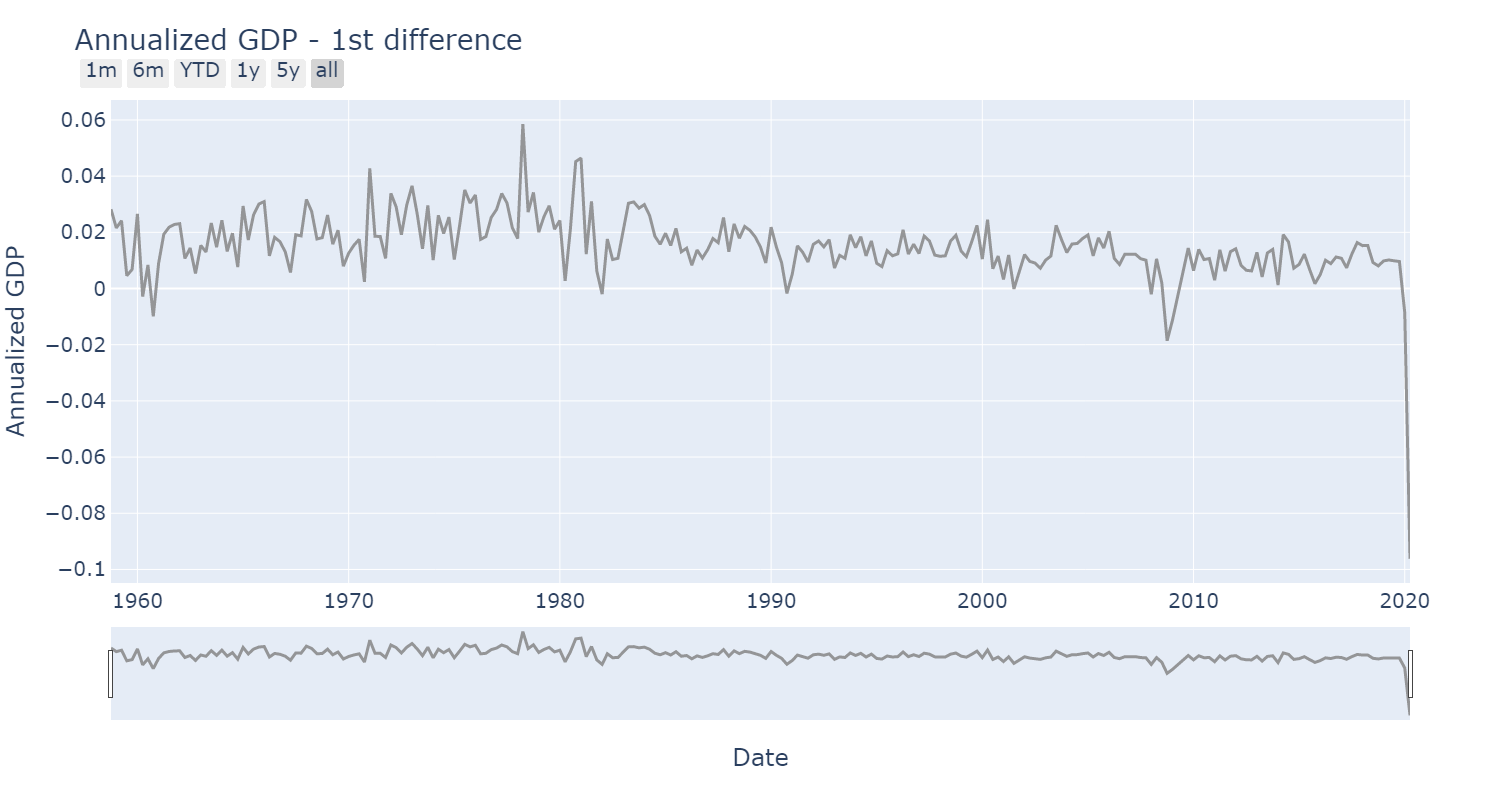

                  GDP
1959-01-01  -0.235876
1959-04-01   0.119519
1959-07-01  -0.811340
1959-10-01   0.490898
1960-01-01   2.912852
...               ...
2019-04-01   0.034188
2019-07-01  -0.029068
2019-10-01  -0.025669
2020-01-01  -1.890918
2020-04-01  10.234875

[246 rows x 1 columns]
['GDP']


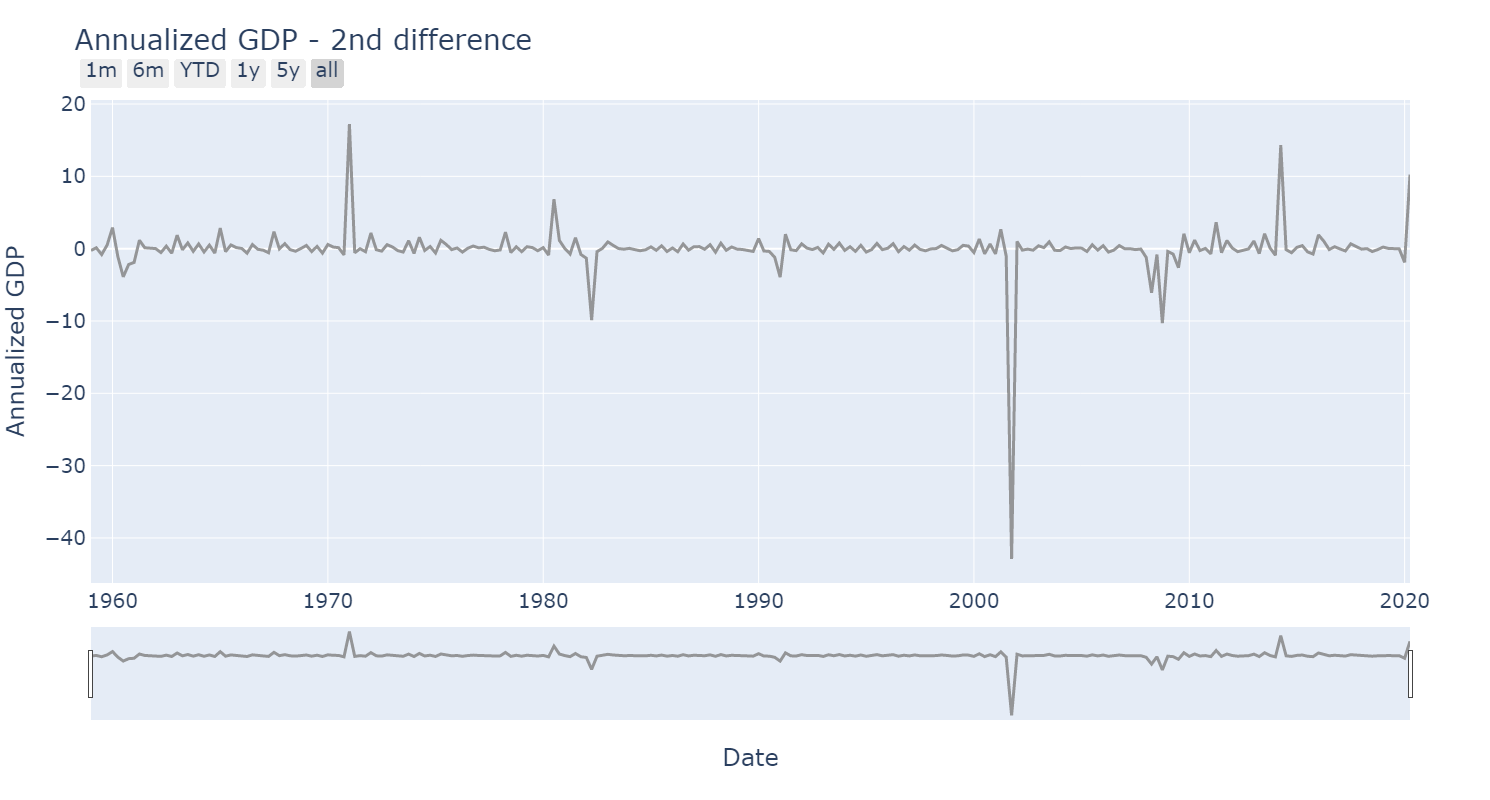

In [4]:
diff1 = difference(t1,1)
diff2 = difference(t1,1)
diff2 = difference(diff2,1)

print(diff1)

print(diff2)

econ_data_labels = { "GDP":
      { "column_name": "GDP",
        "color": "gray",
        "name": "GDP diff_1",
        "text": "GDP"
      }}
econ_data_titles = { 'titles':
      { 'chart_title': 'Annualized GDP - 1st difference',
        'y_axis_title': 'Annualized GDP',
        'x_axis_title': 'Date',
      }}

plotly_time_series(df_labels = econ_data_labels, df_titles = econ_data_titles, df = diff1, font = 1)

print(diff2)

econ_data_labels = { "GDP":
      { "column_name": "GDP",
        "color": "gray",
        "name": "GDP diff_2",
        "text": "GDP"
      }}
econ_data_titles = { 'titles':
      { 'chart_title': 'Annualized GDP - 2nd difference',
        'y_axis_title': 'Annualized GDP',
        'x_axis_title': 'Date',
      }}

plotly_time_series(df_labels = econ_data_labels, df_titles = econ_data_titles, df = diff2, font = 1)

Viewing the charts above it seems the first and second differencing stabilized the data. But we can go further statistically analyzing the original, 1st, and 2nd difference by using the Augmented-Dickey Fuller tests. 

### Augmented-Dickey Fuller stationarity test

In [5]:
# Running the Augmented-Dickey Fuller test
t1_adf = adfuller(t1.values)
diff1_adf = adfuller(diff1.values)
diff2_adf = adfuller(diff2.values)

print('')
print('ADF Statistic: %f - Original data' % t1_adf[0])
print('ADF Statistic: %f - 1st diff' % diff1_adf[0])
print('ADF Statistic: %f - 2nd diff' % diff2_adf[0])
print('')
print('p-value %f - Original data' % t1_adf[1])
print('p-value %f - 1st diff' % diff1_adf[1])
print('p-value %f - 2nd diff' % diff2_adf[1])

print('')

print('Origrinal data - Critical values:')
for key, value in t1_adf[4].items():
    print('\t%s: %.3f' % (key,value))
    
if t1_adf[0] < t1_adf[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")

print('')
print('1st diff - Critical values:')
for key, value in diff1_adf[4].items():
    print('\t%s: %.3f' % (key,value))
    
if diff1_adf[0] < diff1_adf[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('')
print('2nd diff - Critical values:')
for key, value in diff2_adf[4].items():
    print('\t%s: %.3f' % (key,value))
    
if diff2_adf[0] < diff2_adf[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")


ADF Statistic: -1.948500 - Original data
ADF Statistic: -2.386430 - 1st diff
ADF Statistic: -15.558325 - 2nd diff

p-value 0.309600 - Original data
p-value 0.145603 - 1st diff
p-value 0.000000 - 2nd diff

Origrinal data - Critical values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Failed to Reject Ho - Time Series is Non-Stationary

1st diff - Critical values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
Failed to Reject Ho - Time Series is Non-Stationary

2nd diff - Critical values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
Reject Ho - Time Series is Stationary



CONCLUSION : The ADF test yielded for the original and 1st differenced data failed or was greater than the critial values. The 2nd difference is stationary

###
Autocorrelation



US GDP annualized data


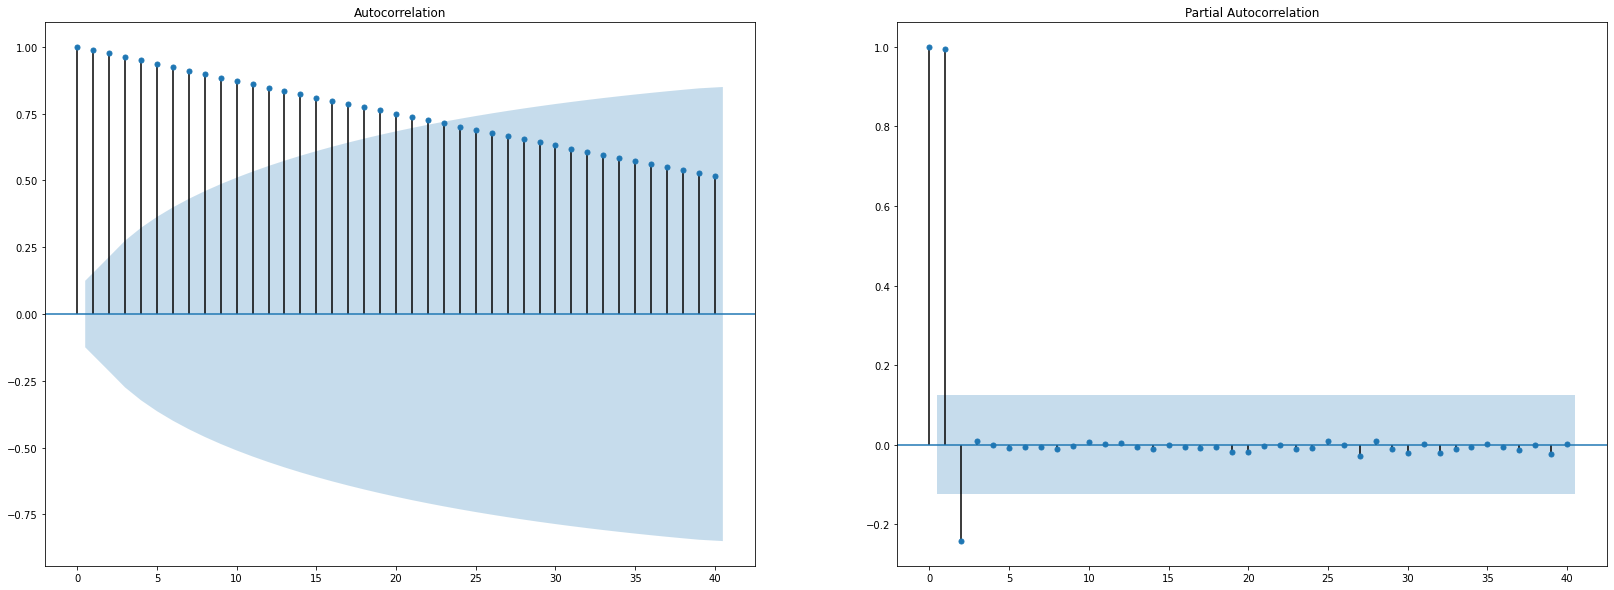



US GDP annualized data - 1st differenced data


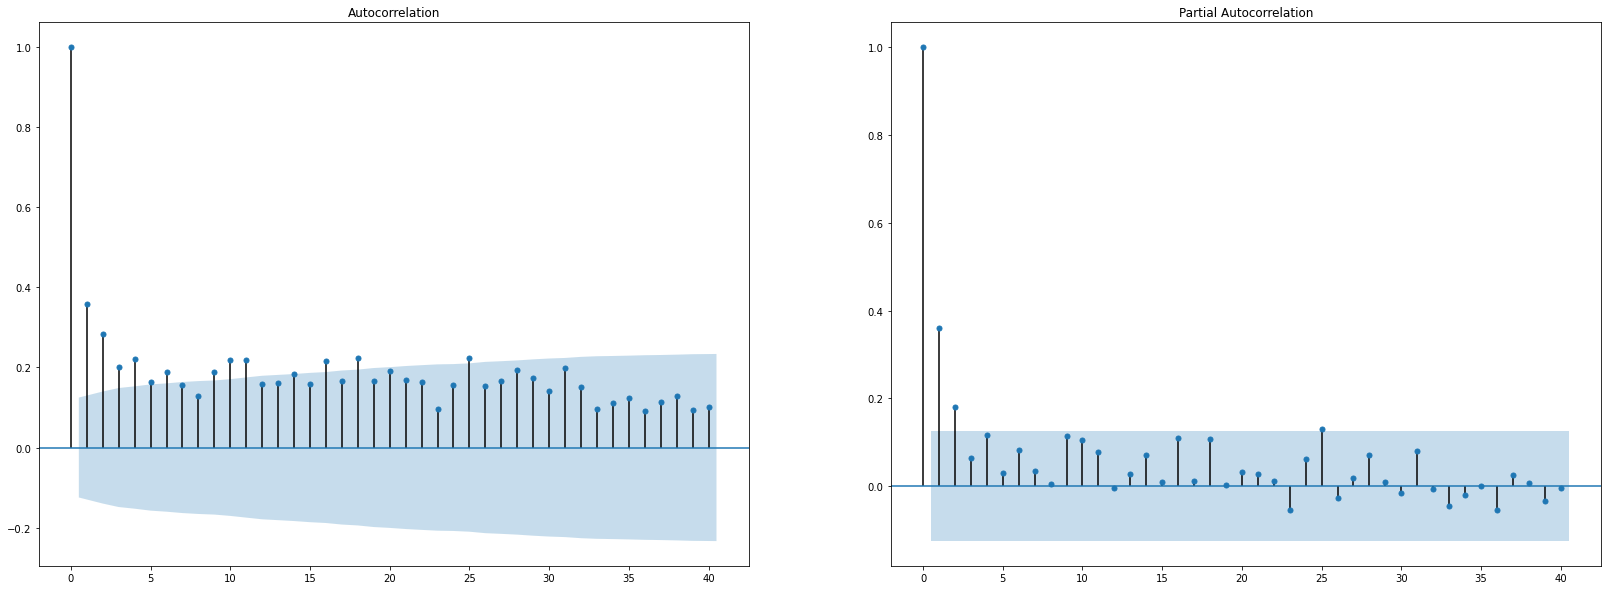



US GDP annualized data - 2nd differenced data


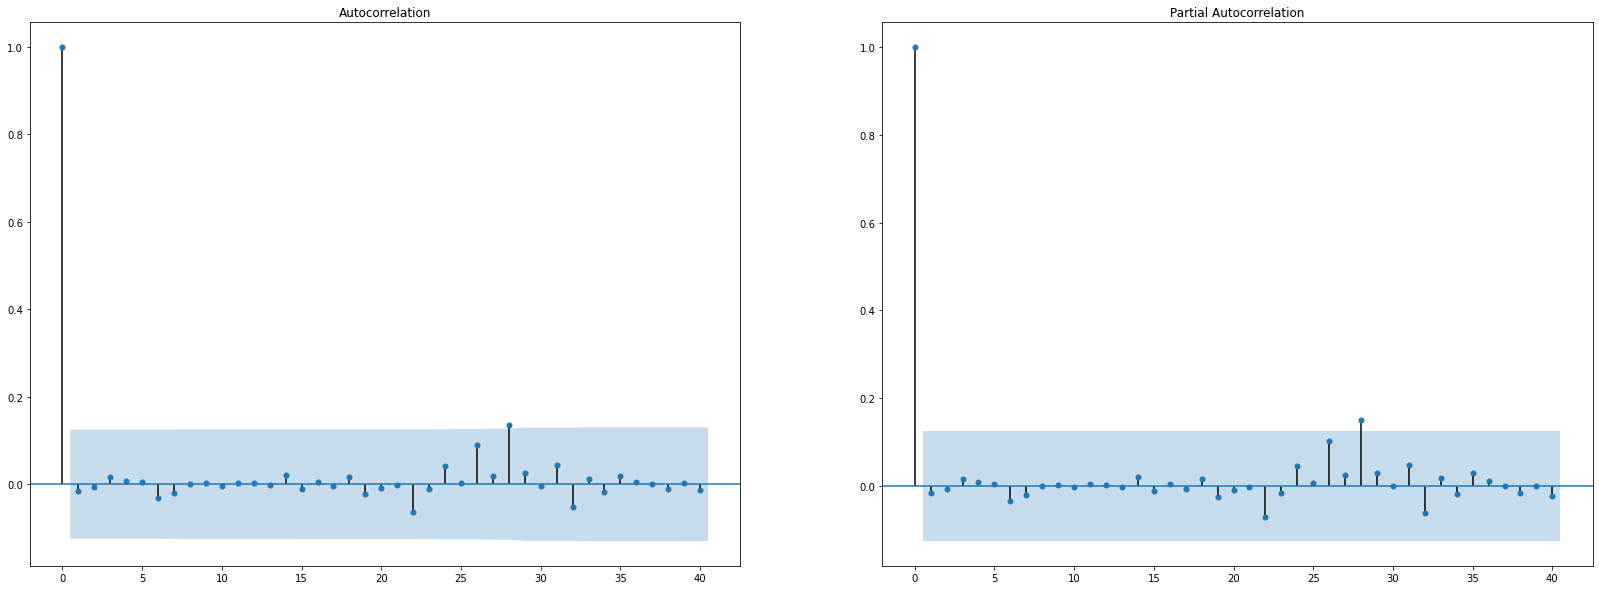

In [6]:

#returns = arithmetic_return(df['GBM'], period=1)
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# dta = sm.datasets.sunspots.load_pandas().data
# dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
# del dta["YEAR"]
# #print if you want to visualize
# #print(dta.head())

print('')
print('')
print('US GDP annualized data')
fig, ax = plt.subplots(1,2,figsize=(28,10))
sm.graphics.tsa.plot_acf(t1.squeeze(), lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(t1.squeeze(), lags=40, ax=ax[1])
plt.show()

print('')
print('')
print('US GDP annualized data - 1st differenced data')
fig, ax = plt.subplots(1,2,figsize=(28,10))
sm.graphics.tsa.plot_acf(diff1.squeeze(), lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff1.squeeze(), lags=40, ax=ax[1])
plt.show()

print('')
print('')
print('US GDP annualized data - 2nd differenced data')
fig, ax = plt.subplots(1,2,figsize=(28,10))
sm.graphics.tsa.plot_acf(diff2.squeeze(), lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff2.squeeze(), lags=40, ax=ax[1])
plt.show()



CONCLUSION : The 2nd differenced data looks to be non-correlated because the ACF and PACF graphs show the data to be within the blue band.
    

### Scatter correlation graph

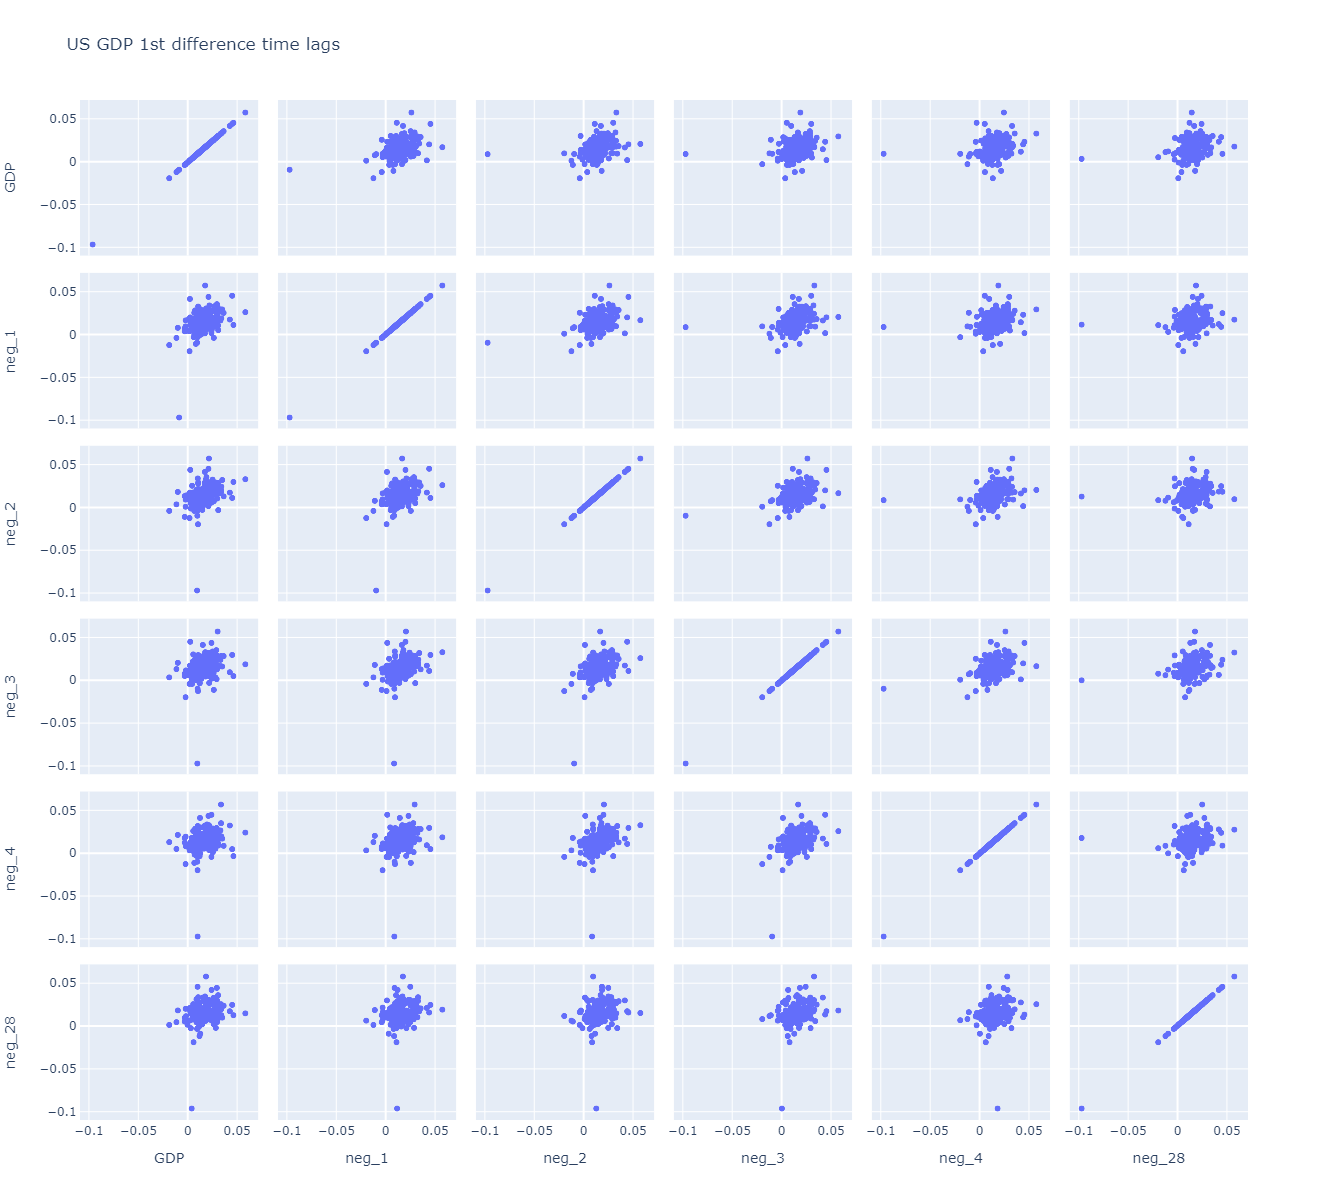

In [7]:
df_B = None
df_B = diff1
    
df1, shift_name1 = function_shift(df = df_B, shift = -1)
df2, shift_name2 = function_shift(df = df_B, shift = -2)
df3, shift_name3 = function_shift(df = df_B, shift = -3)
df4, shift_name4 = function_shift(df = df_B, shift = -4)
df5, shift_name5 = function_shift(df = df_B, shift = -28)

df = pd.concat([df_B, df1, df2, df3, df4, df5], axis=1, join='inner')

fig = go.Figure(data=go.Splom(
                dimensions=[dict(label=df.columns[0],
                                 values=df.iloc[:, 0]),
                            dict(label=df.columns[1],
                                 values=df.iloc[:, 1]),
                            dict(label=df.columns[2],
                                 values=df.iloc[:, 2]),
                            dict(label=df.columns[3],
                                 values=df.iloc[:, 3]),
                            dict(label=df.columns[4],
                                 values=df.iloc[:, 4]),
                            dict(label=df.columns[5],
                                 values=df.iloc[:, 5])]))


fig.update_layout(
    title='US GDP 1st difference time lags',
    width=1200,
    height=1200,
)

fig.show()

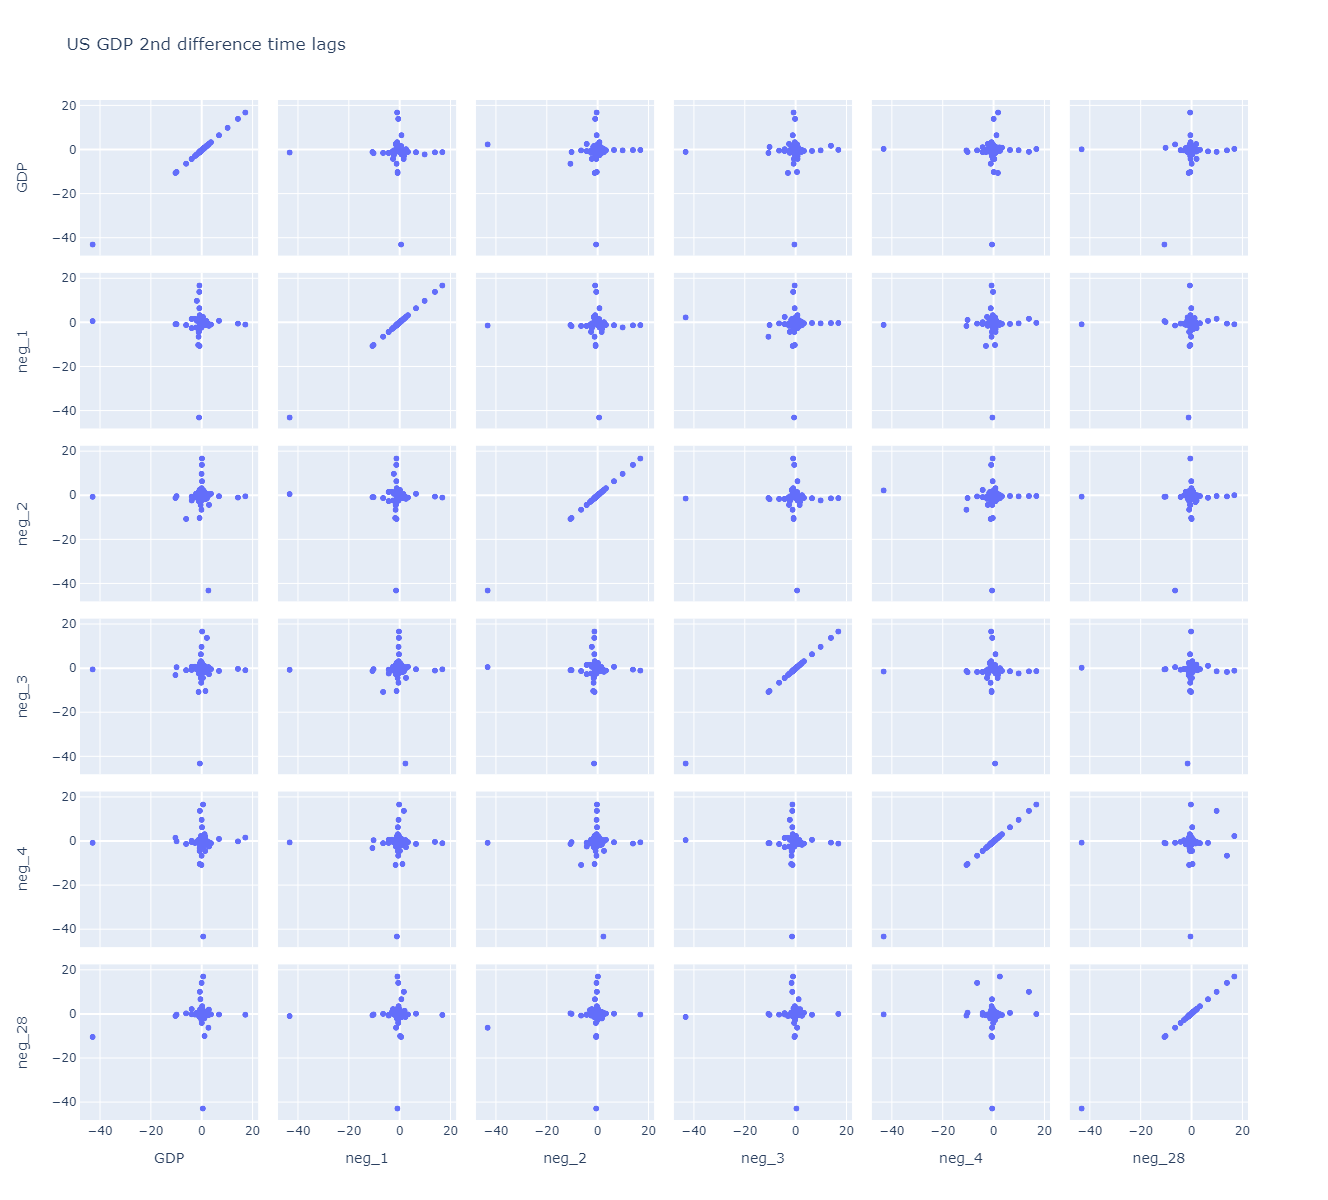

In [8]:
df_B = None
df_B = diff2
    
df1, shift_name1 = function_shift(df = df_B, shift = -1)
df2, shift_name2 = function_shift(df = df_B, shift = -2)
df3, shift_name3 = function_shift(df = df_B, shift = -3)
df4, shift_name4 = function_shift(df = df_B, shift = -4)
df5, shift_name5 = function_shift(df = df_B, shift = -28)

df = pd.concat([df_B, df1, df2, df3, df4, df5], axis=1, join='inner')

fig = go.Figure(data=go.Splom(
                dimensions=[dict(label=df.columns[0],
                                 values=df.iloc[:, 0]),
                            dict(label=df.columns[1],
                                 values=df.iloc[:, 1]),
                            dict(label=df.columns[2],
                                 values=df.iloc[:, 2]),
                            dict(label=df.columns[3],
                                 values=df.iloc[:, 3]),
                            dict(label=df.columns[4],
                                 values=df.iloc[:, 4]),
                            dict(label=df.columns[5],
                                 values=df.iloc[:, 5])]))


fig.update_layout(
    title='US GDP 2nd difference time lags',
    width=1200,
    height=1200,
)

fig.show()


CONCLUSION : The 2nd differenced time lag data looks to be much more sparse compared to the 1st difference time lag data.
    

### ARMA model




$\begin{equation}\,\,ARMA(p,q)\;model\;:=x_t-a_1x_{t-1}-...-a_px_{t-p}=a_o+e_t+b_1e_{t-1}+...+b_qe_{t-q}\end{equation}$

$\begin{equation}\;\;\;\;\;\;\;\;\,\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\phi_p(B)x_t=a_o+\psi_q(B)e_t\;\;\;\;\;\;\;\end{equation}$

### Overfitting and Underfitting

['TSLA', 'Underfit', 'fit', 'overfit']


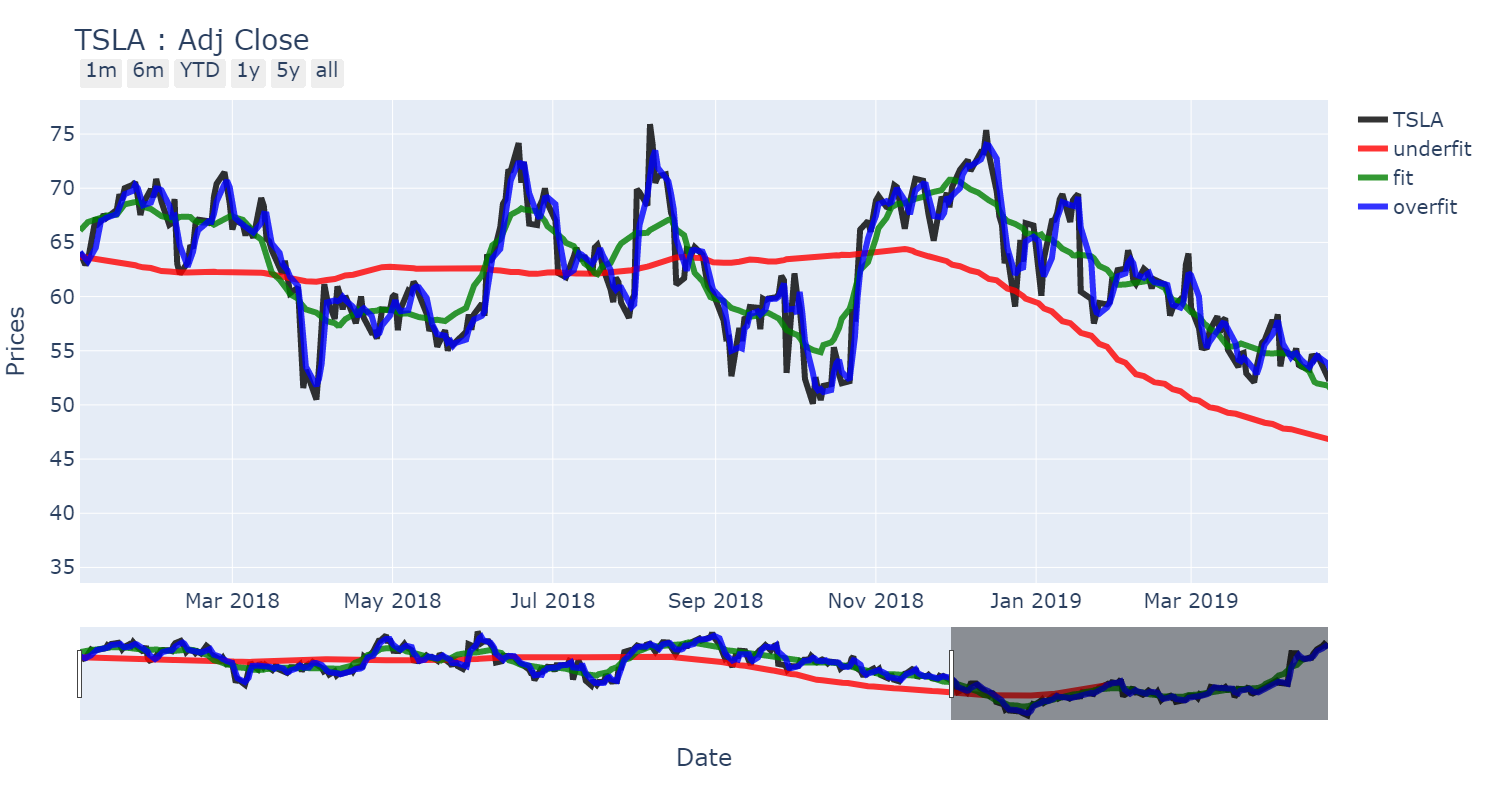

In [65]:
# Download of stock data and generation of stock data

data_type = 'Adj Close'
stock = 'TSLA'
T = 1.

start_date = '2018-01-02'
end_date = '2019-11-14'
random_seed_nr = 100
rndm_seed = True


df = pdr.get_data_yahoo([stock], start=start_date, end=end_date)[data_type]


# initial_value = df[stock][0]
# N = len(df)

# returns = arithmetic_return(df[stock], period = 1)

# mu_st = annualized_mean(sample_mean(returns), period=252) # drift coefficient

# sig2_st = annualized_standard_deviation(sample_standard_deviation(return_values = returns),sample_mean(returns), periods = 252)
# sig_st = np.std(returns)*np.sqrt(252.)  # diffusion coefficient

# stck_nm = stock + ' : ' + data_type

# #df['underfit'] = df[stock].mean(5)

underfit = 100
fit = 20
overfit=3
df['underfit'] = df[stock].rolling(min_periods=1,window=underfit).mean().shift(periods=-(underfit-15))
df['fit'] = df[stock].rolling(min_periods=1,window=fit).mean().shift(periods=-(fit-10))
df['overfit'] = df[stock].rolling(min_periods=1,window=overfit).mean().shift(periods=-(overfit-3))

#df = df.head(50)

df_labels = { stock:
      { "column_name": stock,
        "color": "black",
        "name": stock,
        "text": stock
      },'Underfit': 
      { "column_name": df.columns[1],
        "color": "red",
        "name": df.columns[1],
        "text": df.columns[1]
      },'fit': 
      { "column_name": df.columns[2],
        "color": "green",
        "name": df.columns[2],
        "text": df.columns[2]
      },'overfit': 
      { "column_name": df.columns[3],
        "color": "blue",
        "name": df.columns[3],
        "text": df.columns[3]
      }}

plotly_titles = { 'titles':
      { 'chart_title': stck_nm,
        'y_axis_title': 'Prices',
        'x_axis_title': 'Date',
      }}

econ = plotly_time_series(df_labels,plotly_titles,df, font = 2)



# TensorFlow - Machine Learning

In [33]:
import tensorflow as tf

def compute_gradients(X, Y, w0, w1):
    with tf.GradientTape() as tape:
        loss = loss_mse(X, Y, w0, w1)
    return tape.gradient(loss, [w0, w1])


In [24]:


# Constant Tensors
x1 = tf.constant([2, 3, 4])
x2 = tf.stack([x1, x1])
x3 = tf.stack([x2, x2, x2, x2])
x4 = tf.stack([x3, x3])

print('')
print(f'x1 TensorShape = {x1.shape}')
print(f'x2 TensorShape = {x2.shape}')
print(f'x3 TensorShape = {x3.shape}')
print(f'x4 TensorShape = {x4.shape}')
print('')

x = tf.constant([[3, 5, 7],[4, 6, 8]])

y = x[:, 1]

print(f'x TensorShape = {x.shape}')
print(x)
print('')
print(f'y TensorShape = {y.shape}')
print(y)
print('')


x1 TensorShape = (3,)
x2 TensorShape = (2, 3)
x3 TensorShape = (4, 2, 3)
x4 TensorShape = (2, 4, 2, 3)

x TensorShape = (2, 3)
tf.Tensor(
[[3 5 7]
 [4 6 8]], shape=(2, 3), dtype=int32)

y TensorShape = (2,)
tf.Tensor([5 6], shape=(2,), dtype=int32)



In [32]:
# Variable Tensors for example w*x

weights = tf.Variable([[1.],[2.]])
x = tf.constant([[3., 4.]])

res = tf.matmul(weights, x)

print('')
print(f'weights TensorShape = {weights.shape}')
print(weights)
print('')
print(f'x TensorShape = {x.shape}')
print(x)
print('')
print(f'result matmult TensorShape = {res.shape}')
print(f'result matmult =\n {res}')


weights TensorShape = (2, 1)
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1.],
       [2.]], dtype=float32)>

x TensorShape = (1, 2)
tf.Tensor([[3. 4.]], shape=(1, 2), dtype=float32)

result matmult TensorShape = (2, 2)
result matmult =
 [[3. 4.]
 [6. 8.]]


In [36]:
# GradientTape calculation

w0 = tf.Variable(0.0)
w1 = tf.Variable(0.0)

dw0, dw1 = compute_gradients(X = x, Y = weights, w0 = w0, w1 = w1)

NameError: name 'loss_mse' is not defined